# 1.Preprocessing dataset

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.cluster import KMeans

## 1.1 Examples of fruit images

In [4]:
Apple_Red_Delicious= glob.glob(r"D:\fruits\fruits-360_dataset_2018_02_08\fruits-360\Training\Apple Red Delicious\*")

Raw data on github: https://github.com/stuartphbs/stuartphbs-PHBS_TQFML/tree/master/dataset

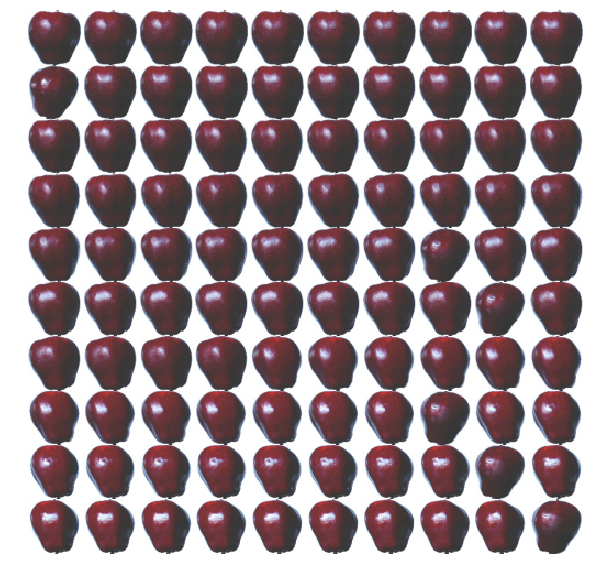

In [5]:
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Apple_Red_Delicious[:100]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(10, 10, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [6]:
Tangelo= glob.glob(r"D:\fruits\fruits-360_dataset_2018_02_08\fruits-360\Training\Tangelo\*")

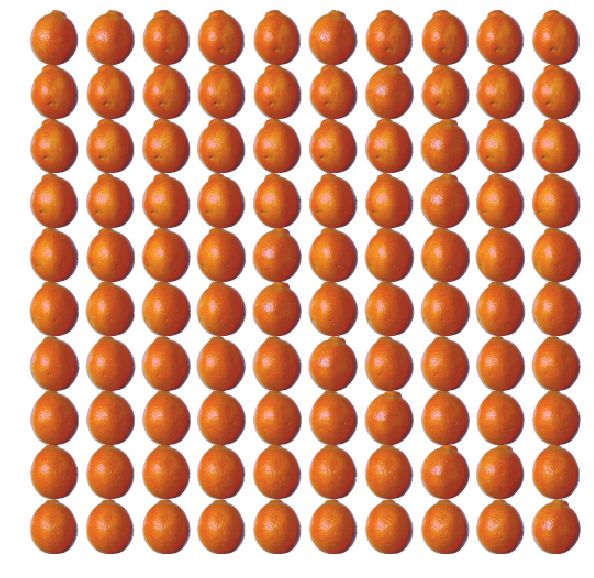

In [7]:
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Tangelo[:100]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(10, 10, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

## 1.2 Preprocessing image data

### 1.2.1 Obtaining training data

In [8]:
training_images = []
labels = [] 
for fruit_dir_path in glob.glob(r"D:\fruits\fruits-360_dataset_2018_02_08\fruits-360\Training\*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        training_images.append(image)
        labels.append(fruit_label)
training_images = np.array(training_images)
training_labels = np.array(labels)

In [9]:
training_images

array([[[[254, 255, 255],
         [254, 255, 255],
         [255, 255, 255],
         ...,
         [255, 253, 254],
         [255, 255, 255],
         [255, 255, 255]],

        [[254, 255, 255],
         [254, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[252, 255, 251],
         [255, 253, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [10]:
training_labels

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ...,
       'Tangelo', 'Tangelo', 'Tangelo'], dtype='<U19')

In [11]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(training_labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [12]:
id_to_label_dict

{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow',
 10: 'Apricot',
 11: 'Avocado',
 12: 'Avocado ripe',
 13: 'Banana',
 14: 'Banana Red',
 15: 'Cactus fruit',
 16: 'Carambula',
 17: 'Cherry',
 18: 'Clementine',
 19: 'Cocos',
 20: 'Dates',
 21: 'Granadilla',
 22: 'Grape Pink',
 23: 'Grape White',
 24: 'Grape White 2',
 25: 'Grapefruit Pink',
 26: 'Grapefruit White',
 27: 'Guava',
 28: 'Huckleberry',
 29: 'Kaki',
 30: 'Kiwi',
 31: 'Kumquats',
 32: 'Lemon',
 33: 'Lemon Meyer',
 34: 'Limes',
 35: 'Litchi',
 36: 'Mandarine',
 37: 'Mango',
 38: 'Maracuja',
 39: 'Nectarine',
 40: 'Orange',
 41: 'Papaya',
 42: 'Passion Fruit',
 43: 'Peach',
 44: 'Peach Flat',
 45: 'Pear',
 46: 'Pear Abate',
 47: 'Pear Monster',
 48: 'Pear Williams',
 49: 'Pepino',
 50: 'Pineapple',
 51: 'Pitahaya Red',
 52: 'Plum',
 53: 'Pomegranate',
 54: 'Q

In [13]:
training_label_ids = np.array([label_to_id_dict[x] for x in training_labels])

In [14]:
scaler = StandardScaler()

In [15]:
training_images_scaled = scaler.fit_transform([i.flatten() for i in training_images])

### 1.2.2 Obtaining test data

In [16]:
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob(r"D:\fruits\fruits-360_dataset_2018_02_08\fruits-360\Validation\*"):
    fruit_label = fruit_dir_path.split("\\")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [17]:
validation_fruit_images

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [254, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [252, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[252, 255, 252],
         [255, 255, 253],
         [255, 253, 254],
         ...,
         [252, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [18]:
validation_labels

array(['Apple Braeburn', 'Apple Braeburn', 'Apple Braeburn', ...,
       'Tangelo', 'Tangelo', 'Tangelo'], dtype='<U19')

In [19]:
test_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [20]:
validation_images_scaled = scaler.transform([i.flatten() for i in validation_fruit_images])

### 1.2.3 Dimensionality reduction and visualizing training data 

In [ ]:
pca = PCA(n_components=50)
training_images_pca = pca.fit_transform(training_images_scaled)

In [ ]:
test_images = pca.transform(validation_images_scaled)

In [ ]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(training_images_pca)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

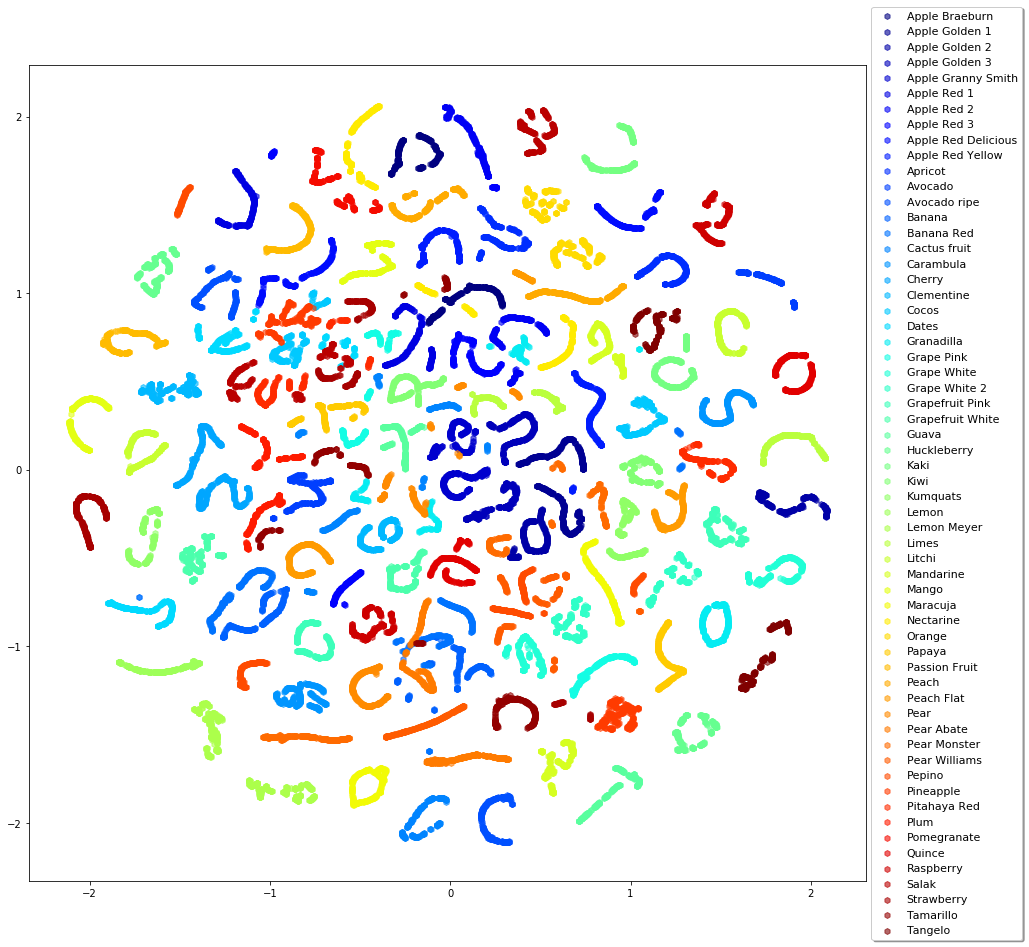

In [41]:
plt.figure(figsize=(15, 15)) 
    
nb_classes = len(np.unique(training_label_ids))
    
cmap = plt.cm.get_cmap("jet", nb_classes)
    
for i, label_id in enumerate(np.unique(training_label_ids)):
    plt.scatter(tsne_result_scaled[np.where(training_label_ids == label_id), 0],
                tsne_result_scaled[np.where(training_label_ids == label_id), 1],
                marker='h',
                c= cmap(i),
                linewidth='1',
                alpha=0.6,
                label=id_to_label_dict[label_id])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fancybox=True, shadow=True, ncol=1, fontsize=11)

# 2 Training models, predicting types of fruit and evaluating models

## 2.1 SVM model

In [94]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(training_images_pca, training_label_ids) 

In [95]:
from sklearn.metrics import accuracy_score
y_pred = svm_clf.predict(test_images)
print('Accuracy: %.4f' % accuracy_score(y_pred,test_label_ids))

Accuracy: 0.4734


In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
confmat = confusion_matrix(y_true = test_label_ids, y_pred = y_pred)
print(confmat)
confmat.shape

[[ 41   0   0 ... 123   0   0]
 [  0  42   0 ... 122   0   0]
 [  0   0  54 ... 110   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...  42 124   0]
 [  0   0   0 ...  59   0 107]]


(60, 60)

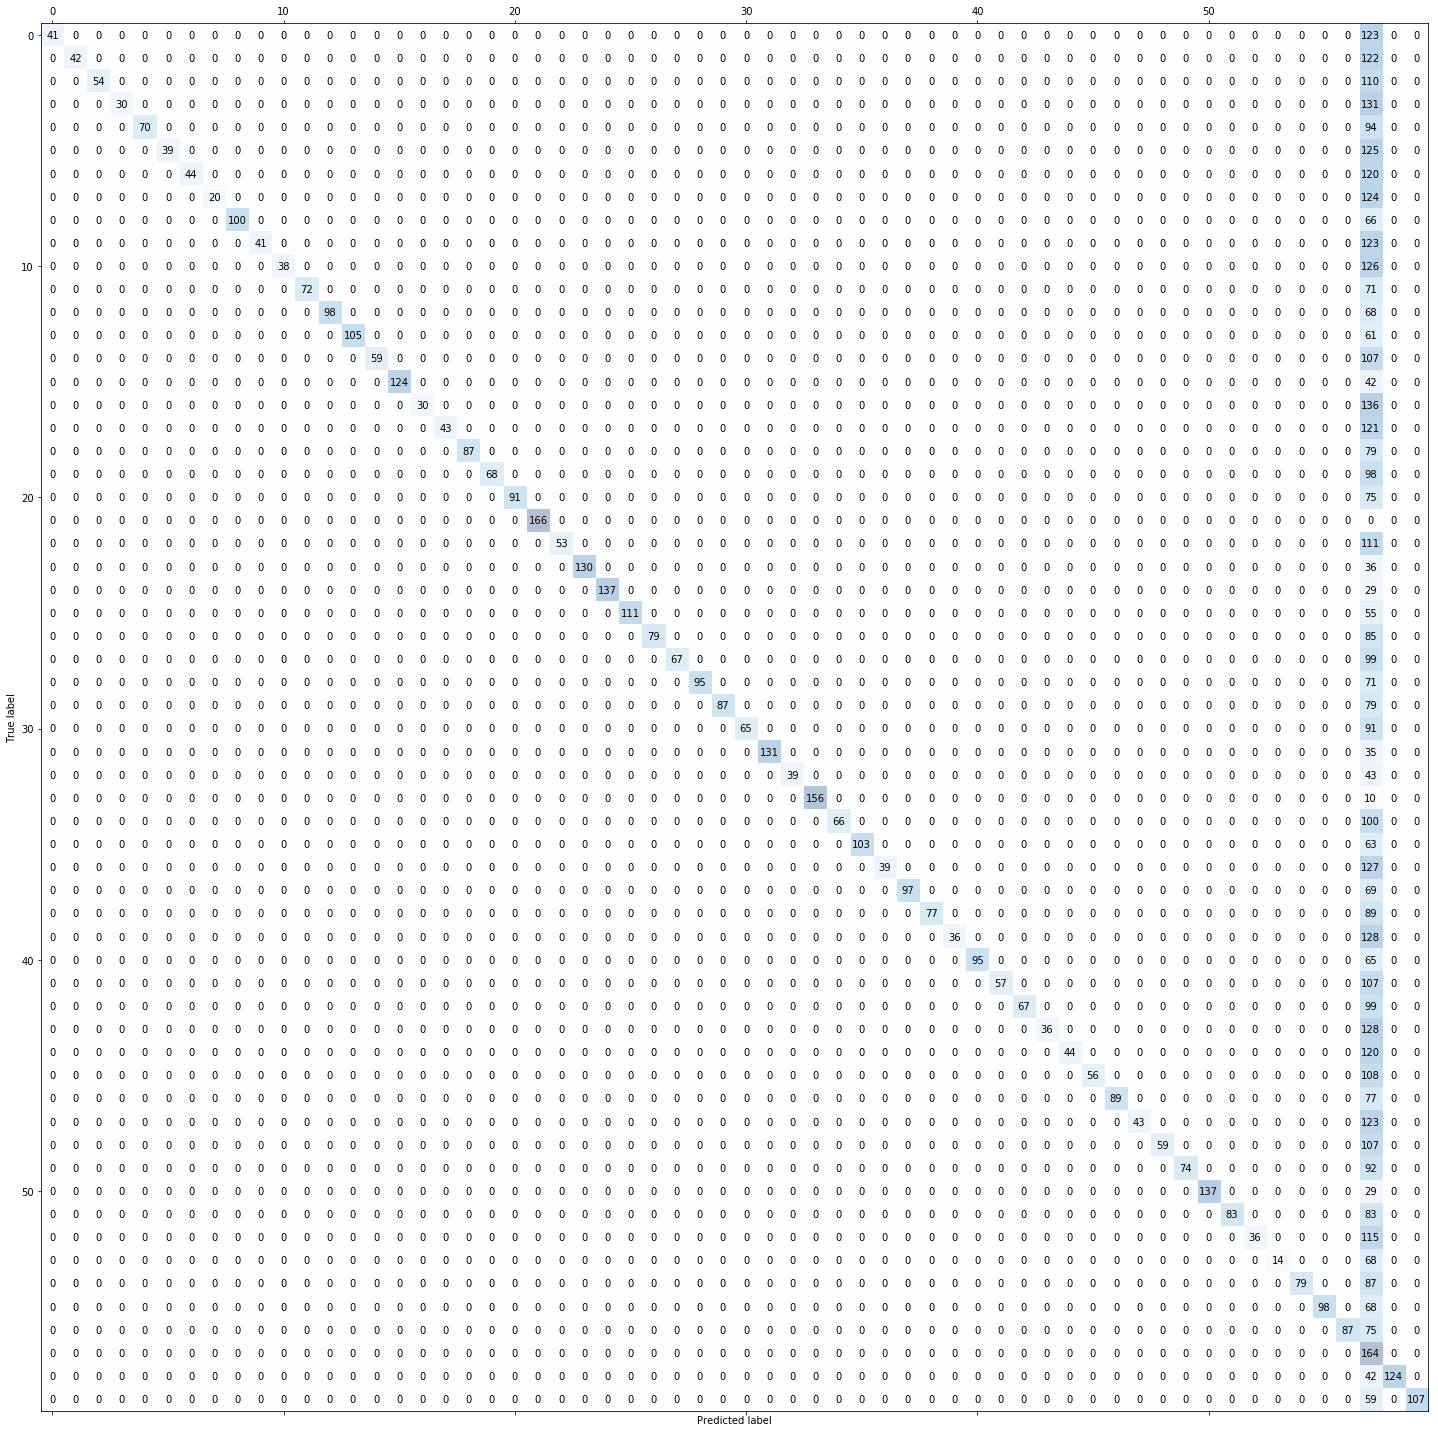

In [98]:
fig, ax = plt.subplots(figsize=(20 , 20))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [99]:
class_list = []
for i in range(1,61):
    fruit_class = 'class ' + str(i)
    class_list.append(fruit_class)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(test_label_ids, y_pred,target_names=class_list))

             precision    recall  f1-score   support

    class 1       1.00      0.25      0.40       164
    class 2       1.00      0.26      0.41       164
    class 3       1.00      0.33      0.50       164
    class 4       1.00      0.19      0.31       161
    class 5       1.00      0.43      0.60       164
    class 6       1.00      0.24      0.38       164
    class 7       1.00      0.27      0.42       164
    class 8       1.00      0.14      0.24       144
    class 9       1.00      0.60      0.75       166
   class 10       1.00      0.25      0.40       164
   class 11       1.00      0.23      0.38       164
   class 12       1.00      0.50      0.67       143
   class 13       1.00      0.59      0.74       166
   class 14       1.00      0.63      0.77       166
   class 15       1.00      0.36      0.52       166
   class 16       1.00      0.75      0.86       166
   class 17       1.00      0.18      0.31       166
   class 18       1.00      0.26      0.42   

Under SVM model,
<br>Average precision: 0.98
<br>Average recall:0.47
<br>Average f1-score:0.60

## 2.2 RandomForest Classification

In [79]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(training_images_pca, training_label_ids) 

In [80]:
y_pred = forest.predict(test_images)
print('Accuracy: %.4f' % accuracy_score(y_pred,test_label_ids))

Accuracy: 0.8660


In [81]:
confmat = confusion_matrix(y_true = test_label_ids, y_pred = y_pred)
print(confmat)

[[120   0   0 ...   0   0   0]
 [  0 135   1 ...   0   0   0]
 [  0  17 141 ...   0   0   0]
 ...
 [  0   0   0 ... 159   0   0]
 [  0   0   0 ...   0 158   0]
 [  0   0   0 ...   0   0 148]]


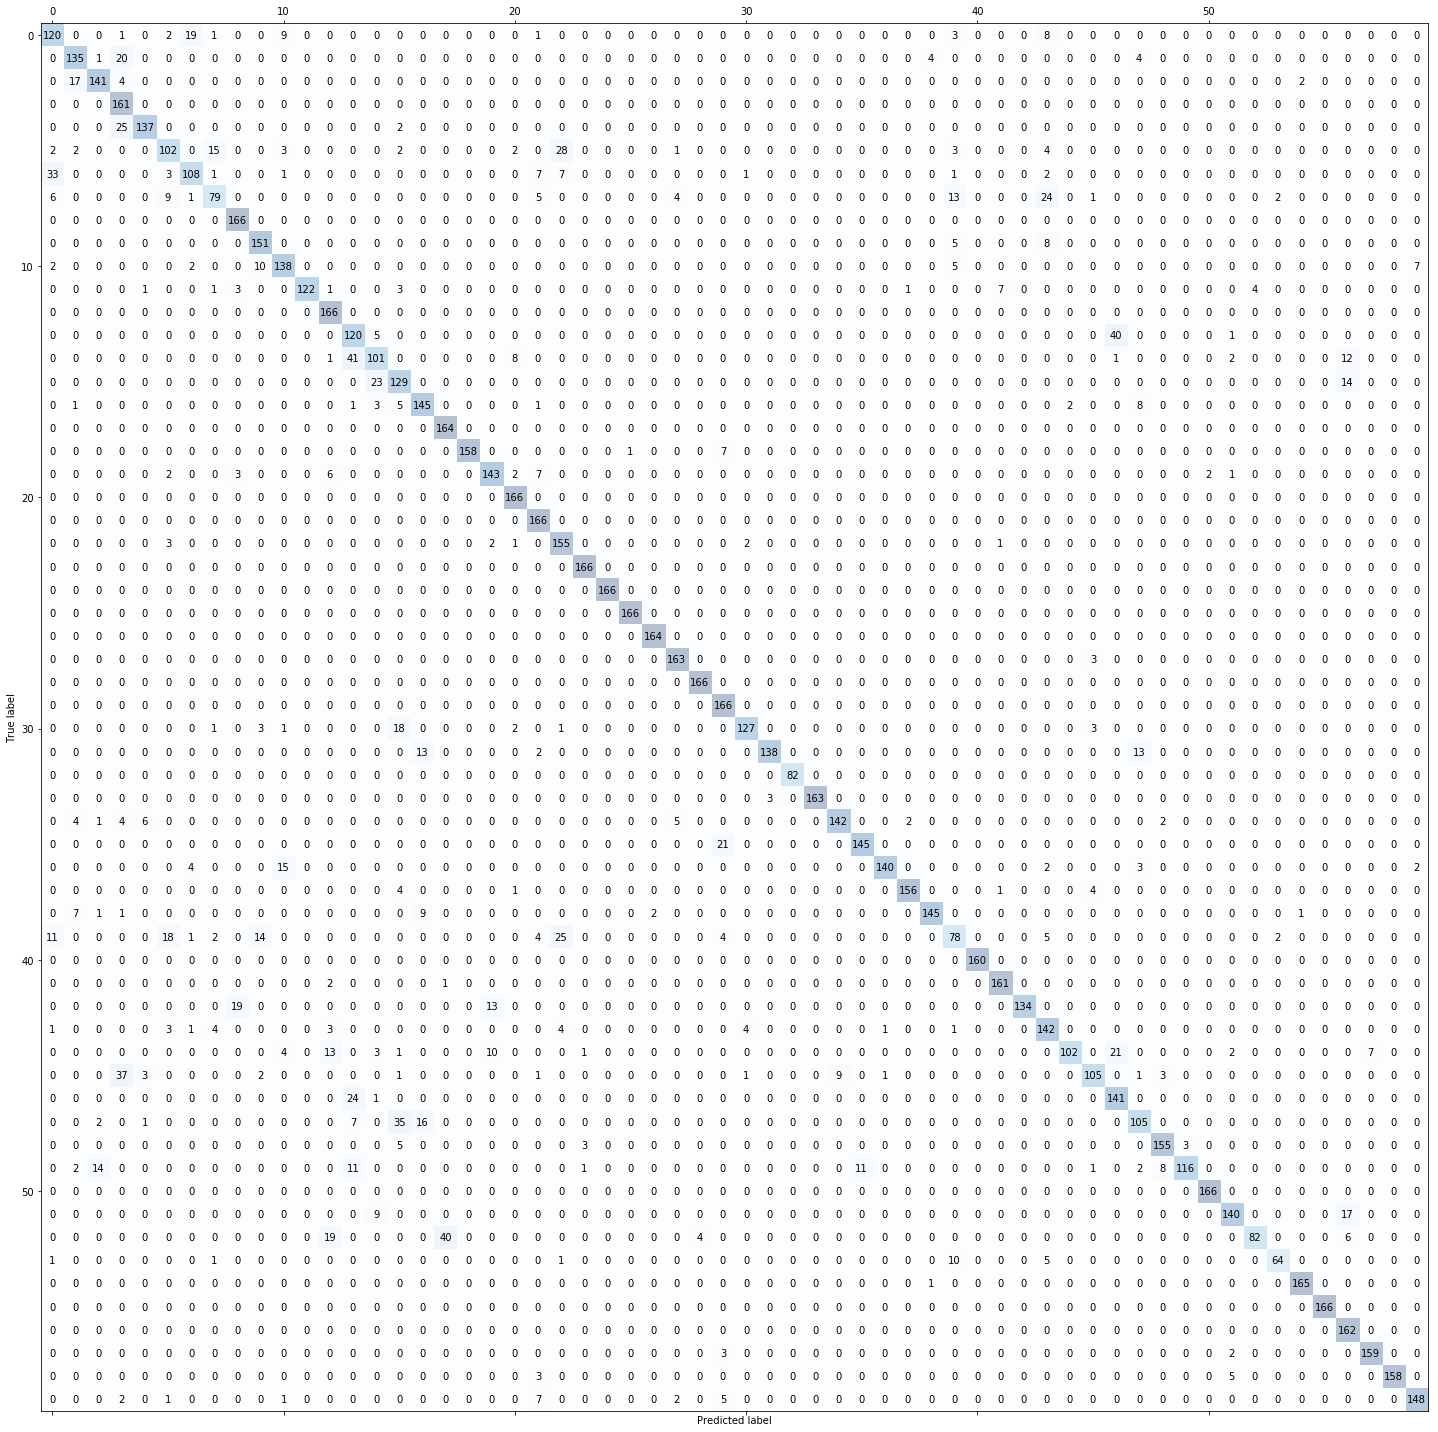

In [82]:
fig, ax = plt.subplots(figsize=(20 , 20))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

In [83]:
print(classification_report(test_label_ids, y_pred,target_names=class_list))

             precision    recall  f1-score   support

    class 1       0.68      0.73      0.71       164
    class 2       0.80      0.82      0.81       164
    class 3       0.88      0.86      0.87       164
    class 4       0.63      1.00      0.77       161
    class 5       0.93      0.84      0.88       164
    class 6       0.71      0.62      0.66       164
    class 7       0.79      0.66      0.72       164
    class 8       0.75      0.55      0.63       144
    class 9       0.87      1.00      0.93       166
   class 10       0.84      0.92      0.88       164
   class 11       0.80      0.84      0.82       164
   class 12       1.00      0.85      0.92       143
   class 13       0.79      1.00      0.88       166
   class 14       0.59      0.72      0.65       166
   class 15       0.70      0.61      0.65       166
   class 16       0.63      0.78      0.70       166
   class 17       0.79      0.87      0.83       166
   class 18       0.80      1.00      0.89   

Under RandomForest,
<br>Average precision: 0.88
<br>Average recall:0.87
<br>Average f1-score:0.86

## 2.3 KNN algorithm

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn= knn.fit(training_images_pca, training_label_ids)

In [85]:
y_pred = knn.predict(test_images)
print('Accuracy: %.4f' % accuracy_score(y_pred,test_label_ids))

Accuracy: 0.9265


In [86]:
confmat = confusion_matrix(y_true = test_label_ids, y_pred = y_pred)
print(confmat)

[[124   0   0 ...   0   0   0]
 [  0 149   9 ...   0   0   0]
 [  0   0 163 ...   0   0   0]
 ...
 [  0   0   0 ... 161   0   0]
 [  0   0   0 ...   0 162   0]
 [  0   0   0 ...   0   0 166]]


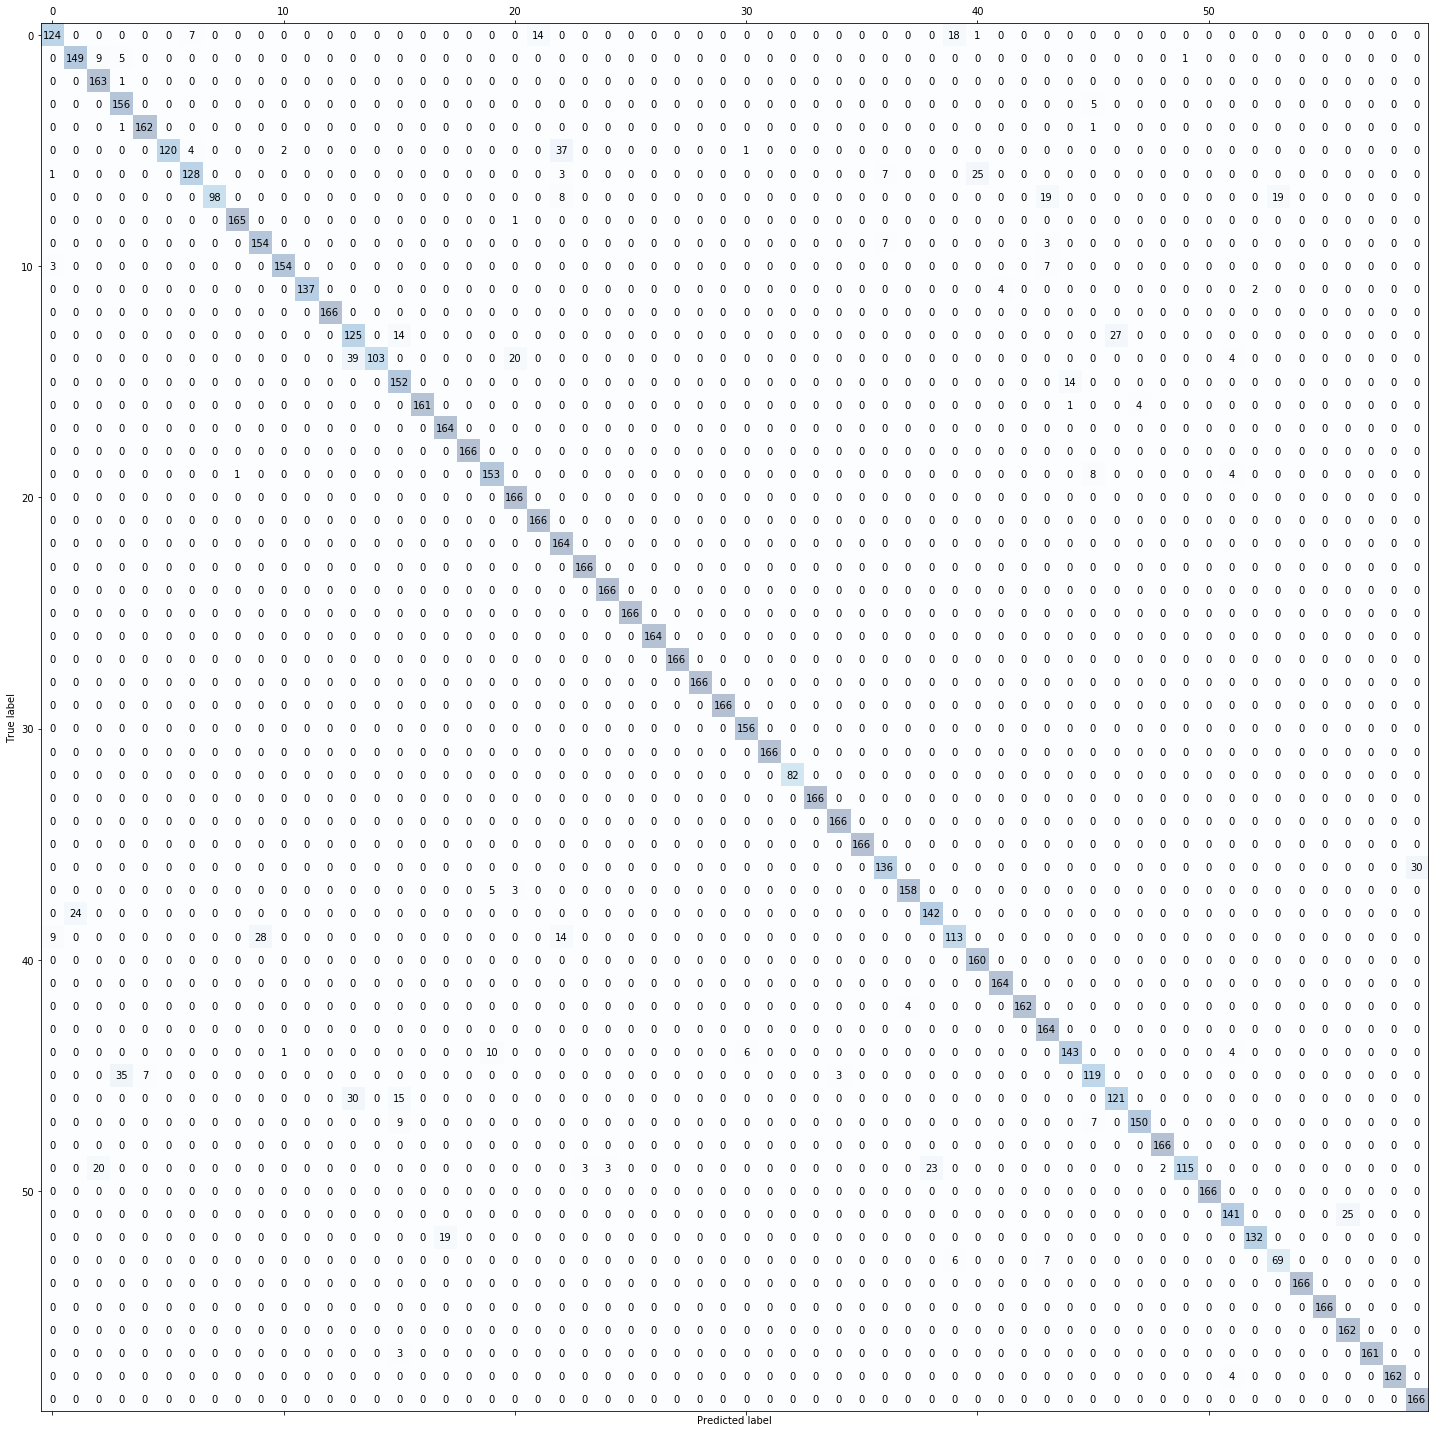

In [87]:
fig, ax = plt.subplots(figsize=(20 , 20))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

plt.show()

In [88]:
print(classification_report(test_label_ids, y_pred,target_names=class_list))

             precision    recall  f1-score   support

    class 1       0.91      0.76      0.82       164
    class 2       0.86      0.91      0.88       164
    class 3       0.85      0.99      0.92       164
    class 4       0.79      0.97      0.87       161
    class 5       0.96      0.99      0.97       164
    class 6       1.00      0.73      0.85       164
    class 7       0.92      0.78      0.84       164
    class 8       1.00      0.68      0.81       144
    class 9       0.99      0.99      0.99       166
   class 10       0.85      0.94      0.89       164
   class 11       0.98      0.94      0.96       164
   class 12       1.00      0.96      0.98       143
   class 13       1.00      1.00      1.00       166
   class 14       0.64      0.75      0.69       166
   class 15       1.00      0.62      0.77       166
   class 16       0.79      0.92      0.85       166
   class 17       1.00      0.97      0.98       166
   class 18       0.90      1.00      0.95   

Under RandomForest,
<br>Average precision: 0.93
<br>Average recall:0.93
<br>Average f1-score:0.93